# Model Evaluation & Business Insights – Telecom Churn

This notebook evaluates the final churn prediction model
and translates model outputs into actionable business insights.

The focus is not only on model performance,
but on how predictions can be used to reduce customer churn.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


### Load Test Data & Model Outputs

In [6]:
X_test = pd.read_csv("../data/processed/X_test_scaled.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

# Load predicted probabilities from the selected model
# (Assuming Random Forest is the final model)
from joblib import load
rf_model = load("../outputs/churn_model.pkl")

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


### Confusion Matrix (Code)

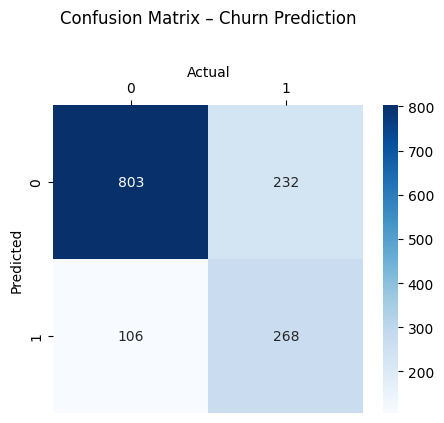

In [18]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.xaxis.tick_top()        # move x-axis to top
ax.xaxis.set_label_position('top')

ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")

ax.set_title("Confusion Matrix – Churn Prediction", pad=30)
plt.show()


### Confusion Matrix Interpretation

- True Positives: Correctly identified churners
- False Negatives: Missed churners (highest business cost)
- False Positives: Customers incorrectly flagged as churners
- True Negatives: Correctly identified loyal customers

From a business perspective, reducing False Negatives is the top priority.


### Classification Report

In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



ROC-AUC Evaluation

In [20]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc


0.8394275233149914

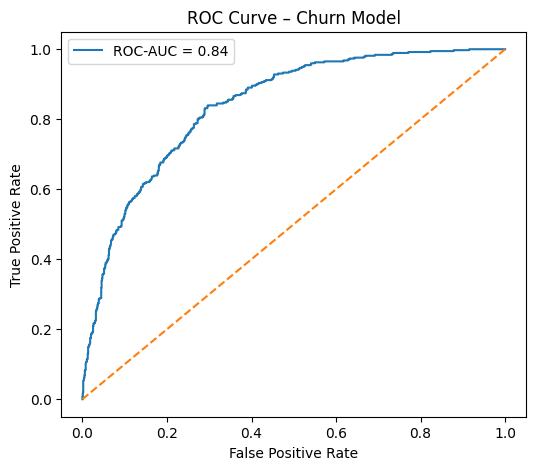

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Churn Model")
plt.legend()
plt.show()


### Threshold Tuning

In [23]:
custom_threshold = 0.35

y_pred_custom = (y_prob >= custom_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[706 329]
 [ 58 316]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1035
           1       0.49      0.84      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.70      1409
weighted avg       0.81      0.73      0.74      1409



### Threshold Decision Explanation

Threshold Optimization

The default probability threshold of 0.5 was adjusted to 0.35
to increase recall for churners.

This decision reflects a business preference for:
- Identifying more at-risk customers
- Accepting a manageable increase in false positives

This allows proactive retention strategies before customers leave.


### Business Segmentation of Customers

In [24]:
results_df = X_test.copy()
results_df['actual_churn'] = y_test
results_df['churn_probability'] = y_prob
results_df['predicted_churn'] = y_pred_custom


### Risk Tier Creation

In [25]:
def churn_risk_tier(prob):
    if prob >= 0.7:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

results_df['risk_segment'] = results_df['churn_probability'].apply(churn_risk_tier)

results_df['risk_segment'].value_counts()


risk_segment
Low Risk       809
Medium Risk    337
High Risk      263
Name: count, dtype: int64

### Retention Strategy by Risk Segment

High Risk:
- Personalized retention offers
- Dedicated customer support
- Contract upgrades or discounts

Medium Risk:
- Service recommendations
- Loyalty incentives
- Engagement campaigns

Low Risk:
- No immediate action
- Monitor behavior periodically


### Estimated Business Impact

By proactively targeting high-risk customers:
- Churn rates can be reduced
- Customer lifetime value can be increased
- Retention budgets can be allocated efficiently

Even a small reduction in churn rate can result in
significant revenue savings for telecom providers.


## Project Summary

- Built an end-to-end churn prediction pipeline
- Identified key behavioral drivers of churn
- Selected an optimized machine learning model
- Translated predictions into actionable business strategies

This project demonstrates how data analytics and machine learning
can directly support business decision-making.
